<a href="https://colab.research.google.com/github/Mayank-004/Boston-Crime/blob/main/Boston_Crime_Analysis_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary packages

In [156]:
import warnings 
import numpy as np
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from scipy import stats
from pylab import rcParams
from matplotlib.pyplot import MultipleLocator


rcParams['figure.figsize'] = (20, 8)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.tree import export_graphviz
from IPython.display import Image 
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import random
import time
random.seed(786)
from patsy import dmatrices


## Part 1 - Data preprocessing (understanding the data)

### Load data

In [157]:
url1 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/f4495ee9-c42c-4019-82c1-d067f07e45d2/download/tmplvp64a10.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False, encoding = 'latin')
url2 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/be047094-85fe-4104-a480-4fa3d03f9623/download/script_113631134_20210423193017_combine.csv'
dataset2 = pd.read_csv(url2, error_bad_lines=False, encoding = 'latin')
url3 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/34e0ae6b-8c94-4998-ae9e-1b51551fe9ba/download/script_113631134_20210423192813_combine.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False, encoding = 'latin')
url4 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/e86f8e38-a23c-4c1a-8455-c8f94210a8f1/download/crime-incident-reports-2018.csv'
dataset4 = pd.read_csv(url4, error_bad_lines=False, encoding = 'latin')
url5 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/64ad0053-842c-459b-9833-ff53d568f2e3/download/crime-incident-reports-2017.csv'
dataset5 = pd.read_csv(url5, error_bad_lines=False, encoding = 'latin')
url6 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/b6c4e2c3-7b1e-4f4a-b019-bef8c6a0e882/download/crime-incident-reports-2016.csv'
dataset6 = pd.read_csv(url6, error_bad_lines=False, encoding = 'latin')
url7 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/792031bf-b9bb-467c-b118-fe795befdf00/download/crime-incident-reports-2015.csv'
dataset7 = pd.read_csv(url7)


dataset = pd.concat([dataset4,dataset5,dataset6,dataset7],ignore_index=True)

dataset1=pd.concat([dataset1,dataset2,dataset3],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [158]:
part_one = dataset[dataset['UCR_PART']=='Part One']
cr1=part_one['OFFENSE_DESCRIPTION'].unique().tolist()
part_Two = dataset[dataset['UCR_PART']=='Part Two']
cr2=part_Two['OFFENSE_DESCRIPTION'].unique().tolist()
part_Three = dataset[dataset['UCR_PART']=='Part Three']
cr3=part_Three['OFFENSE_DESCRIPTION'].unique().tolist()
other=dataset[dataset['UCR_PART']=='Other']
cr4=other['OFFENSE_DESCRIPTION'].unique().tolist()


In [160]:
for i in range(len(dataset1)):
    for j in cr1:
        if dataset1.loc[i,'OFFENSE_DESCRIPTION'] == j:
            dataset1.loc[i,'UCR_PART']='Part One'
            #print(union_df_new.loc[i,'UCR_PART'])


for i in range(len(dataset1)):
    for j in cr2:
        if dataset1.loc[i,'OFFENSE_DESCRIPTION']==j:
            dataset1.loc[i,'UCR_PART']='Part Two'

for i in range(len(dataset1)):
    for j in cr3:
        if dataset1.loc[i,'OFFENSE_DESCRIPTION']==j:
            dataset1.loc[i,'UCR_PART']='Part Three'

for i in range(len(dataset1)):
    for j in cr4:
        if dataset1.loc[i,'OFFENSE_DESCRIPTION']==j:
            dataset1.loc[i,'UCR_PART']='Other'


In [161]:
dataset=pd.concat([dataset,dataset1],ignore_index=True)

In [162]:
dataset.shape

(465074, 17)

In [163]:
dataset.YEAR.value_counts()

2017    101338
2016     99430
2018     98888
2020     70894
2015     53597
2021     21145
2019     19782
Name: YEAR, dtype: int64

In [164]:
dataset.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [7]:
dataset.describe(include=[object])

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
count,465074,353253,465074,462839,465074,113276,465074,465074,353156,453867,465074
unique,423001,67,295,13,881,3,346494,7,4,12001,33002
top,I152071596,Motor Vehicle Accident Response,INVESTIGATE PERSON,B2,,0,2016-08-01 00:00:00,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,20,41064,28706,72393,35675,110222,33,70674,176042,21016,22530


In [8]:
dataset.describe().round()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,465074.0,465074.0,465074.0,465074.0,442544.0,442544.0
mean,2321.0,2017.0,7.0,13.0,42.0,-70.0
std,1197.0,2.0,3.0,6.0,4.0,6.0
min,111.0,2015.0,1.0,0.0,-1.0,-71.0
25%,1001.0,2016.0,4.0,9.0,42.0,-71.0
50%,3005.0,2017.0,7.0,14.0,42.0,-71.0
75%,3201.0,2018.0,10.0,18.0,42.0,-71.0
max,99999.0,2021.0,12.0,23.0,42.0,0.0


In [9]:
import pandas_profiling
pandas_profiling.ProfileReport(dataset)

TypeError: ignored

### Data Preparation

In [165]:
dataset['OCCURRED_ON_DATE'] = pd.to_datetime(dataset['OCCURRED_ON_DATE'])
dataset['SHOOTING'].fillna('0', inplace=True)
# Convert DAY_OF_WEEK to an ordered category
dataset['DAY_OF_WEEK'] = pd.Categorical(dataset.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

In [166]:
# Rename columns to something easier to type 
rename = {'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'STREET':'Street'}
dataset.rename(index=str, columns=rename, inplace=True)

In [167]:
# Checking the Group value
dataset['Group'].value_counts()

Motor Vehicle Accident Response              41064
Larceny                                      28906
Medical Assistance                           26211
Investigate Person                           20420
Other                                        19860
                                             ...  
HUMAN TRAFFICKING                                8
INVESTIGATE PERSON                               5
Burglary - No Property Taken                     5
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Name: Group, Length: 67, dtype: int64

In [168]:
# Checking District value
dataset.District.unique()

array(['B3', 'E18', 'E5', 'A1', 'D4', 'B2', 'C11', 'E13', 'C6', 'D14',
       'A7', 'A15', nan, 'External'], dtype=object)

In [169]:
#Replace District code
district = {'A1' : 'Downtown', 'A15': 'Charlestown','A7': 'East Boston','B2': 'Roxbury','B3': 'Mattapan','C6': 'South Boston','C11': 'Dorchester','D4': 'South End','D14': 'Brighton','E5': 'West Roxbury','E13': 'Jamaica Plain','E18': 'Hyde Park','HTU': 'Human Traffic Unit'}

#Replace code into names
dataset['District'] = dataset['District'].replace(district)

In [170]:
# Checking Location Null value
dataset['Location'].isnull().sum()

0

In [171]:
def getLatitude(x):
    k = x.replace("(","")
    k = k.replace(")","")
    k = k.replace(" ","")
    k = k.split(',')
    k[0] = float(k[0])
#     print(k[0])
    return(k[0])

In [172]:
def getLongitude(x):
    k = x.replace("(","")
    k = k.replace(")","")
    k = k.replace(" ","")
    k = k.split(',')
    k[1] = float(k[1])
#     print(k[1])
    return(k[1])

In [173]:
getLatitude(dataset.iloc[0]["Location"])

42.27997063

In [174]:
dataset["latitude"] = dataset['Location']
dataset["latitude"] =  dataset["latitude"].apply(lambda x: getLatitude(x))

In [175]:
dataset["longitude"] = dataset['Location']
dataset["longitude"] =  dataset["longitude"].apply(lambda x: getLongitude(x))

In [177]:
data = dataset.drop(columns=["Lat","Long","Location"])

In [178]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,Group,Description,District,Area,Shooting,Date,Year,Month,Day,Hour,UCR_PART,Street,latitude,longitude
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,Mattapan,468,0,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534
1,I192077332,619,Larceny,LARCENY ALL OTHERS,Hyde Park,496,0,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853
2,I192076660,2629,Harassment,HARASSMENT,West Roxbury,662,0,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211
3,I192075386,2629,Harassment,HARASSMENT,Downtown,96,0,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988
4,I192075335,3208,Property Lost,PROPERTY - MISSING,South End,132,0,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838


In [179]:
#A function to check if it is day or night
def isNight(hour) :
    if hour >= 20 or hour <= 5:
        return 1
    else :
        return 0

#Create a new column    
data['IS_NIGHT'] = data['Hour'].apply(lambda x : isNight(x))

In [180]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,Group,Description,District,Area,Shooting,Date,Year,Month,Day,Hour,UCR_PART,Street,latitude,longitude,IS_NIGHT
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,Mattapan,468,0,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,0
1,I192077332,619,Larceny,LARCENY ALL OTHERS,Hyde Park,496,0,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,0
2,I192076660,2629,Harassment,HARASSMENT,West Roxbury,662,0,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,0
3,I192075386,2629,Harassment,HARASSMENT,Downtown,96,0,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,0
4,I192075335,3208,Property Lost,PROPERTY - MISSING,South End,132,0,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,1


In [181]:
data.District.value_counts()

Roxbury          72393
Dorchester       61961
South End        60056
Mattapan         52225
Downtown         50933
South Boston     34341
Brighton         29776
Jamaica Plain    25884
Hyde Park        25660
West Roxbury     20190
East Boston      19269
Charlestown       9760
External           391
Name: District, dtype: int64

In [182]:
data.Group.value_counts()

Motor Vehicle Accident Response              41064
Larceny                                      28906
Medical Assistance                           26211
Investigate Person                           20420
Other                                        19860
                                             ...  
HUMAN TRAFFICKING                                8
INVESTIGATE PERSON                               5
Burglary - No Property Taken                     5
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Name: Group, Length: 67, dtype: int64

## EDA
### Types of serious crimes

Text(0.5, 1.0, 'Top Crime Type During High Crime Hour in Boston from 2015 to 2021')

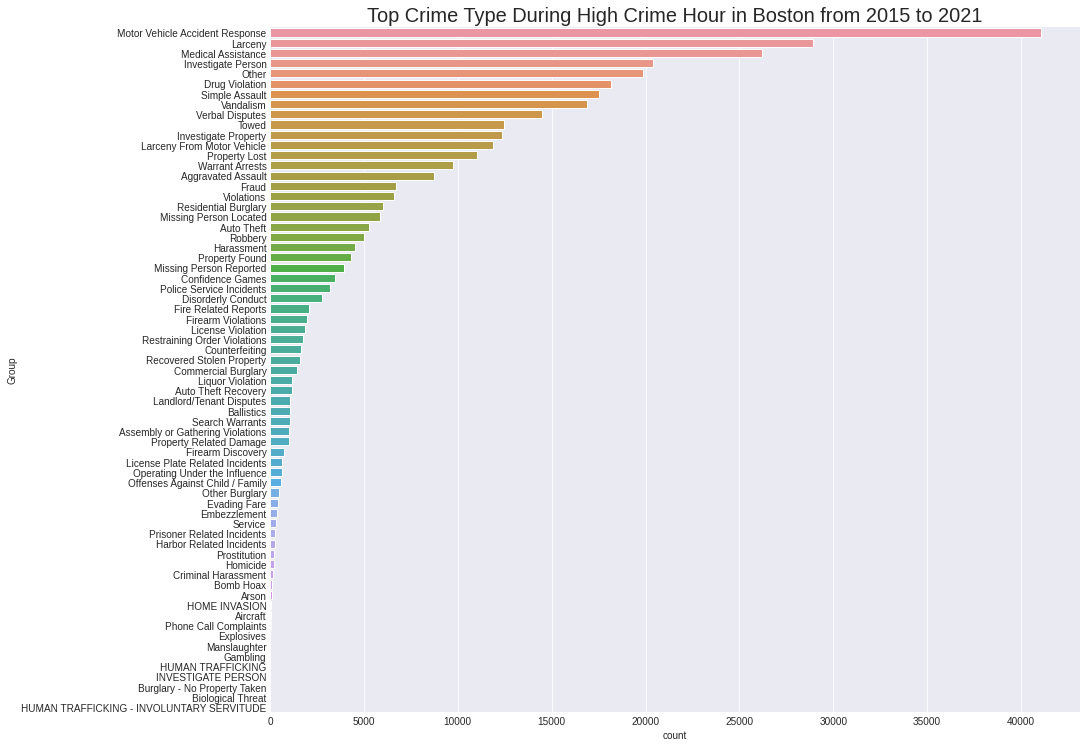

In [52]:
sns.catplot(y='Group', kind='count', height=10, aspect=1.5, order=data.Group.value_counts().index,  data=data)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title("Top Crime Type During High Crime Hour in Boston from 2015 to 2021", size = 20)

### When do serious crimes occur?

Text(-7.324999999999999, 0.5, 'Count')

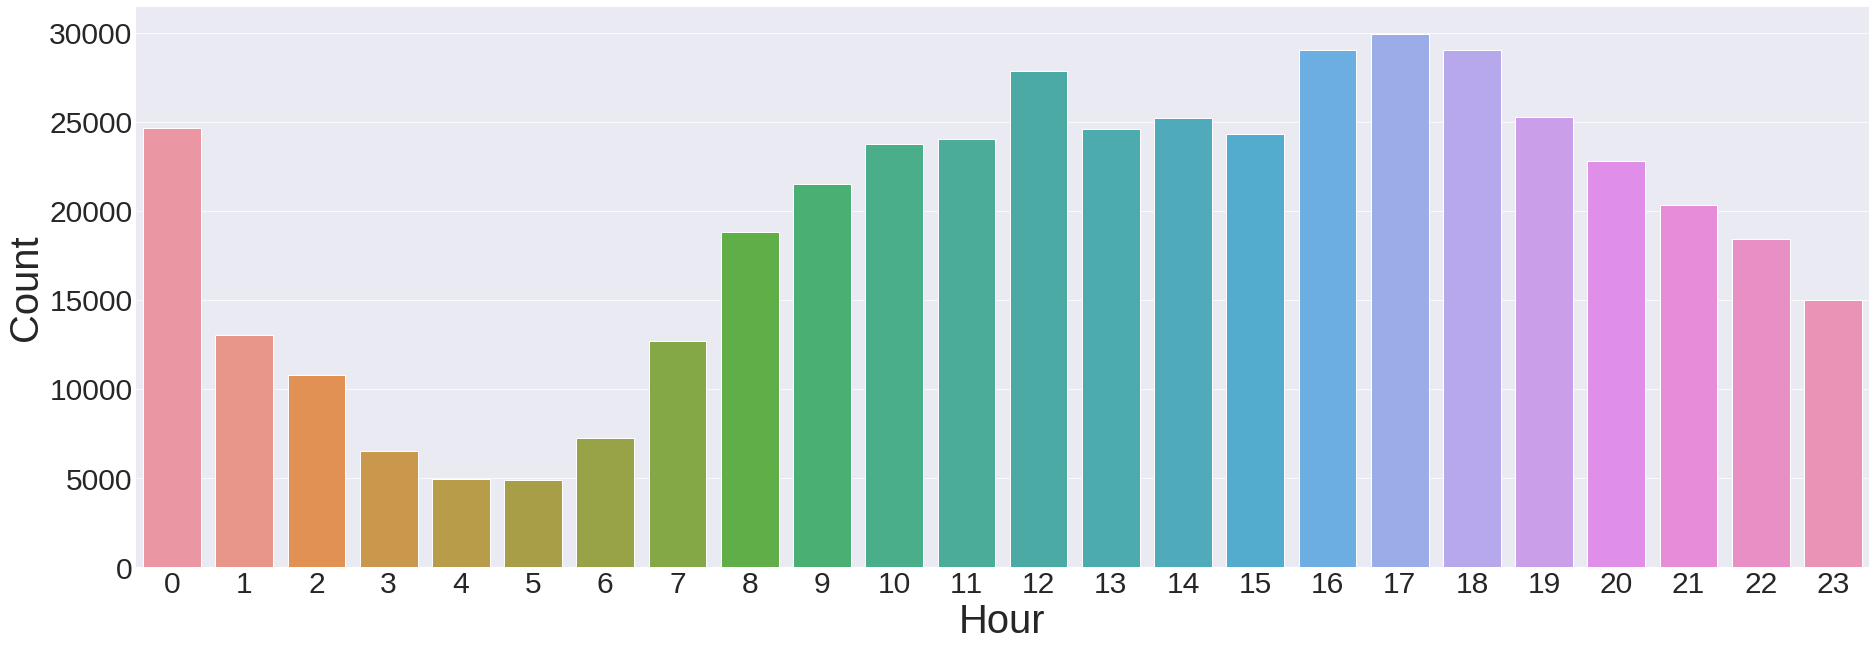

In [53]:
# Based on hour 
sns.catplot(x='Hour',
           kind='count',
            height=8.27, 
            aspect=3,
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Hour', fontsize=40)
plt.ylabel('Count', fontsize=40)

Text(-7.324999999999978, 0.5, 'Count')

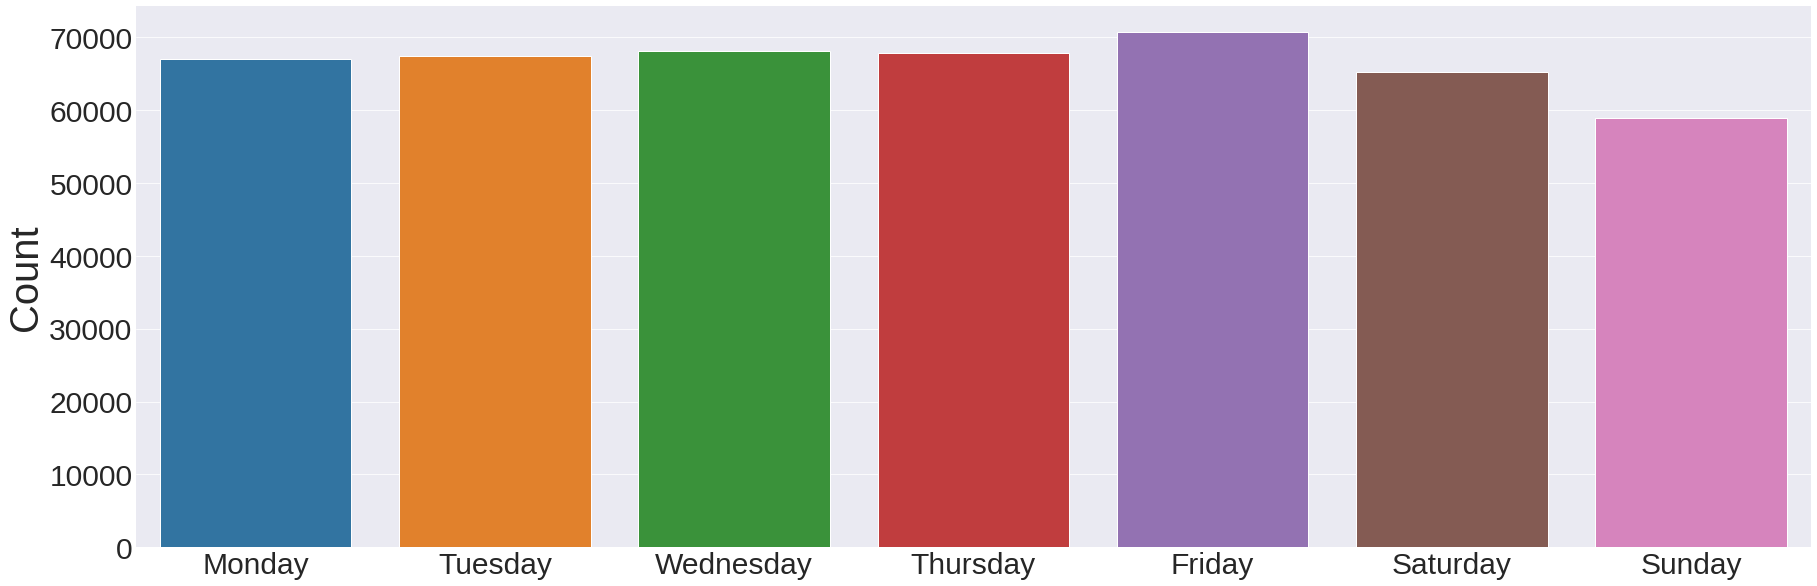

In [54]:
# Based on date
sns.catplot(x='Day',
           kind='count',
            height=8, 
            aspect=3,
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

In [55]:
x=data.groupby('Group')['Day'].value_counts()
x= pd.DataFrame(x)

Text(-7.324999999999999, 0.5, 'Count')

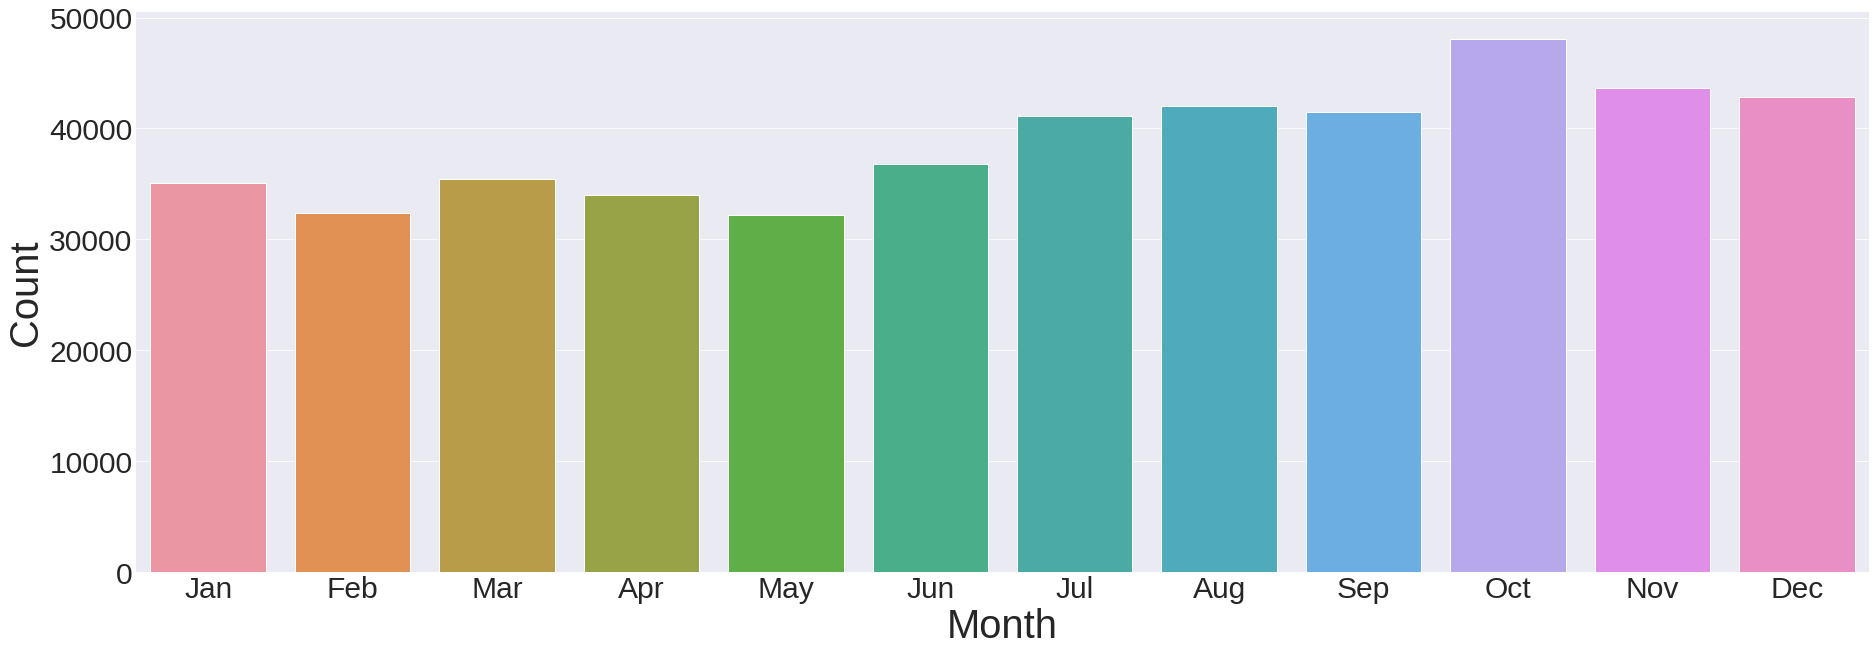

In [56]:
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.catplot(x='Month',
           kind='count',
            height=8.27, 
            aspect=3,
           data=data)
plt.xticks(np.arange(12), Months, size=30)

# plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Month', fontsize=40)
plt.ylabel('Count', fontsize=40)

### Total number of crime each year

In [183]:
def number_of_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(data.loc[data[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number


In [184]:
list_unique_year, list_number_year = number_of_crime('Year',data['Year'].unique())


In [185]:
def bar_chart(list_number, list_unique):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 0

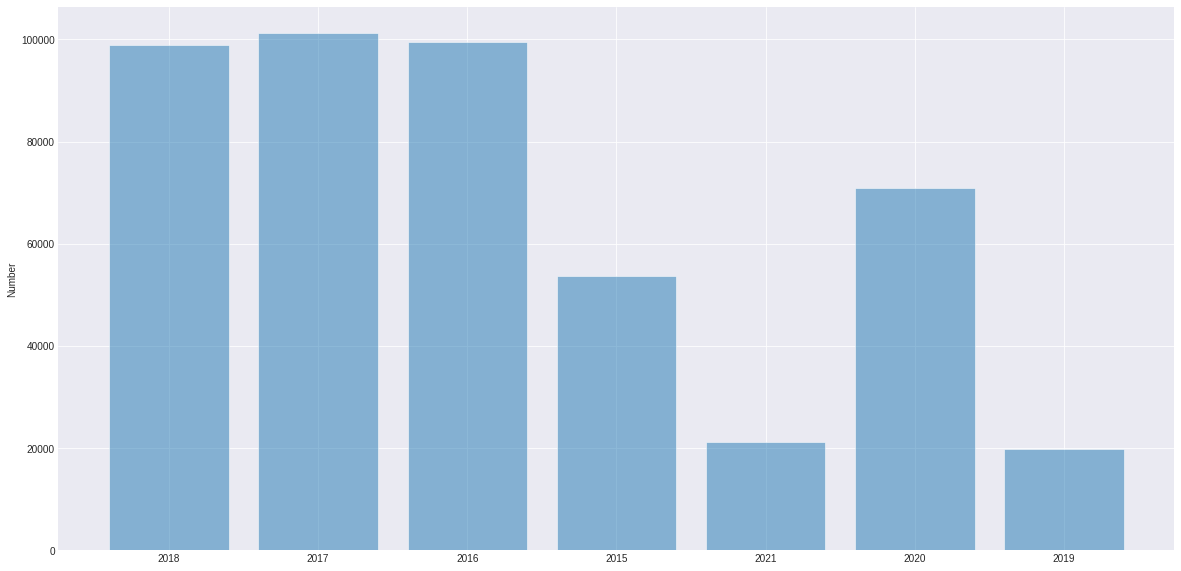

0

In [186]:
bar_chart(list_number_year,list_unique_year)

### Data cleaning 

In [187]:
# Counts all missing values
total = data.isnull().sum().sort_values(ascending = False)
frames = [total]
# pd.concat(): axis=0 means index, axis=1 means column, keys = name of the column.
missing = pd.concat(frames, axis = 1, keys = ['Total'])
missing.head()

,Total
Group,111821
UCR_PART,28714
Street,11207
District,2235
IS_NIGHT,0


In [62]:
data.isnull().mean().sort_values(ascending=False) * 100

Group              24.043701
UCR_PART            6.174071
Street              2.409724
District            0.480569
IS_NIGHT            0.000000
Shooting            0.000000
OFFENSE_CODE        0.000000
Description         0.000000
Area                0.000000
Year                0.000000
Date                0.000000
longitude           0.000000
Month               0.000000
Day                 0.000000
Hour                0.000000
latitude            0.000000
INCIDENT_NUMBER     0.000000
dtype: float64

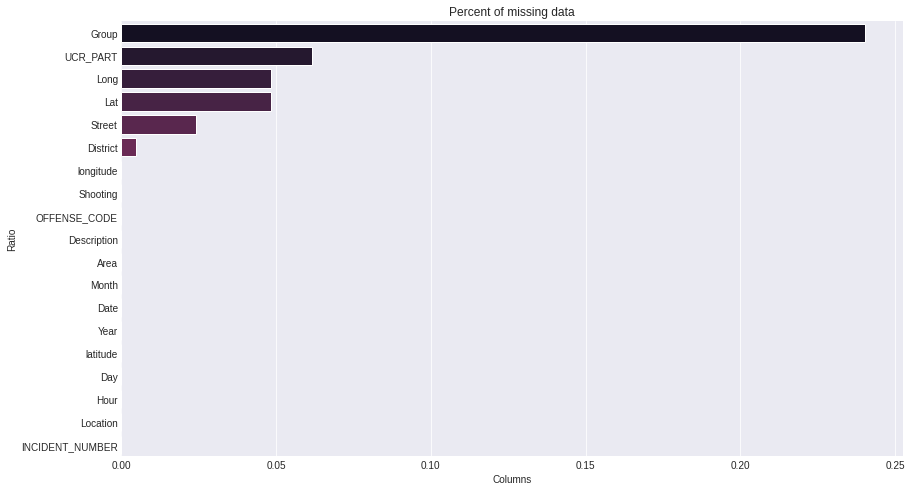

In [63]:
# Presenting missing values by using barplot
missing = dataset.isnull().sum().sort_values(ascending=False).div(len(dataset))
plt.figure(figsize=(14,8))
sns.barplot(y=missing.index, x=missing.values, palette="rocket")
plt.title("Percent of missing data")
plt.xlabel("Columns")
plt.ylabel("Ratio")
plt.show()

In [188]:
# Drop missing rows from Columns
data.dropna(subset = ["UCR_PART"], inplace=True) # Drop rows with no values 
#data.dropna(subset = ["Group"], inplace=True) # Drop rows with no values 

In [189]:
# check missing value in df
missing = data.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / data.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Group,83204,19.067742
Street,11207,2.568292
District,2109,0.483317


In [190]:
## removing columns with missing values more than 10%
missing_df = missing_df.reset_index()
over10 = list(missing_df.loc[missing_df['Percent'] >= 10,'index'])
data = data.drop(over10, axis = 1)

In [191]:
data.dropna(inplace=True)

### Model Building

In [223]:
## defining a reusable function to evaluate model performance

def eval_result(model_name,y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
    from matplotlib import pyplot as plt

    train_accuracy = accuracy_score(y_train, y_predtrain)
    print(f'training data accuracy {train_accuracy}')
    #train_roc_auc = roc_auc_score(y_train, y_predtrain) 
    #print(f' Area under the ROC curve for training data {train_roc_auc}')
    
    test_accuracy = accuracy_score(y_test, y_predtest)
    print(f'testing data accuracy {test_accuracy}')
    #test_roc_auc = roc_auc_score(y_test, y_predtest) 
    #print(f' Area under the ROC curve for testing data {test_roc_auc}')
    
    print(classification_report(y_test,y_predtest,digits=5))
    #plot_confusion_matrix(model_name, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    #plot_roc_curve(model_name, X_test, y_test)


In [193]:
def run_model(model,verbose=True):
    t0=time.time()
    if verbose== False:
        model.fit(X_train,y_train.values.ravel(),verbose=0)
    else :
        model.fit(X_train,y_train.values.ravel())
    
    time_taken= time.time()- t0
    print(f'Time taken: {time_taken}')

In [204]:
#removing the unwated features from the list and keeping remaining
features = ['District', 'Year', 'Month', 'Day',
       'Street', 'latitude',
       'longitude', 'IS_NIGHT']
target = ['UCR_PART']

X = data[features]
y = data[target]



In [208]:

#Encoder
def label_encoder(dataset):
    dataset_lencoded = dataset.copy(deep=True);

   
    #Takes in dataset, returns label encoded dataframe and the label encoder models
    label_encoders = [None]*dataset_lencoded.shape[1];

    List_Of_Categories_In_Column=list(dataset_lencoded.select_dtypes(include=['category']))
    J=0
    for i in List_Of_Categories_In_Column:
        le = LabelEncoder()
        dataset_lencoded[i] = le.fit_transform(dataset_lencoded[i])
        label_encoders[J] = le
        J=J+1
    
    List_Of_object_In_Column=list(dataset_lencoded.select_dtypes(include=['object']))
    for i in List_Of_object_In_Column:
        le = LabelEncoder()
        dataset_lencoded[i] = le.fit_transform(dataset_lencoded[i])
        label_encoders[J] = le
        J=J+1
    return dataset_lencoded


In [215]:
X=label_encoder(X)
y=label_encoder(y)

In [216]:
X.dtypes

District       int64
Year           int64
Month          int64
Day            int64
Street         int64
latitude     float64
longitude    float64
IS_NIGHT       int64
dtype: object

In [211]:
X.select_dtypes(include=['category'])

""
0
1
2
3
4
...
465057
465069
465070
465072


In [386]:
# Split relevant variables into matrices and split into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [387]:
X_train

,District,Year,Month,Day,Street,latitude,longitude,IS_NIGHT
434466,3,2020,2,1,8230,42.363746,-71.063546,1
22749,2,2018,10,2,1342,42.303287,-71.063634,1
71169,11,2018,4,0,2651,42.349113,-71.087678,0
23551,3,2018,10,4,6152,42.367089,-71.054811,1
93069,11,2018,1,6,8894,42.340637,-71.075723,0
...,...,...,...,...,...,...,...,...
175067,9,2017,4,0,9031,42.335457,-71.096993,0
132858,1,2017,8,4,9046,42.374588,-71.062940,0
41948,3,2018,7,5,4608,42.348913,-71.062212,0
61098,2,2018,5,2,3241,42.286240,-71.064168,0


### KNN MODEL

In [388]:
# p = 2 is equivalent to using the euclidean distance
# weights = 'distance' means closer points are weighted more heavily than further away points
n_neighbors = 5
model1 = KNeighborsClassifier(n_neighbors=n_neighbors,weights='distance',algorithm='auto',p=2)
run_model(model1)
y_hat_train = model1.predict(X_train)
y_hat_test = model1.predict(X_test)

eval_result(model1,y_train,y_hat_train,y_test,y_hat_test)


Time taken: 1.7315187454223633
training data accuracy 0.9380006475863331
testing data accuracy 0.46297857745130266
              precision    recall  f1-score   support

           0    0.04035   0.02487   0.03077       563
           1    0.31016   0.27402   0.29097     28235
           2    0.55947   0.61503   0.58593     70000
           3    0.37104   0.33997   0.35483     41148

    accuracy                        0.46298    139946
   macro avg    0.32025   0.31347   0.31563    139946
weighted avg    0.45168   0.46298   0.45624    139946



### Random Forest

In [ ]:

# Hyperparameter Tuning
# run once

'''from sklearn.ensemble import RandomForestClassifier


n_estimators_hyp = [100,200,300,400,500,700,1000]
min_sample_leaf_hyp = np.linspace(1,20, 20);

oobscore_list=dict()

for i in n_estimators_hyp:
    for j in min_sample_leaf_hyp:
        model2 = RandomForestClassifier(n_estimators=i, min_samples_leaf=int(j), oob_score=True);
        model2.fit(X_train, y_train)
        key = "n_estimator =" +str(i)+" min_sample_leaf ="+str(j);
        oobscore_list[key]=model2.oob_score_

    #oobscore_list.append(rf_model.oob_score_)

oobscore_list'''

In [225]:
#class_weights = {'Single_Day_Trend':1,'Close':0.85,'High':0.45,'Low':0.45}
model2 = RandomForestClassifier(n_estimators=100,
                                criterion='gini',
                                max_depth=20,
                                min_samples_split=4,
                                min_samples_leaf=1,
                                max_features='auto',
                                oob_score=True,
                                random_state=1234)


run_model(model2)
print(f'Out of bag score for random forest model is:{model2.oob_score_}')


y_hat2_train = model2.predict(X_train)
y_hat2_test = model2.predict(X_test)


eval_result(model2,y_train,y_hat2_train,y_test,y_hat2_test)

Time taken: 43.32532501220703
Out of bag score for random forest model is:0.5292786451367674
training data accuracy 0.7463819633128265
testing data accuracy 0.5317836879939405
              precision    recall  f1-score   support

           0    0.38462   0.00888   0.01736       563
           1    0.47806   0.17907   0.26054     28235
           2    0.54793   0.86694   0.67147     70000
           3    0.46632   0.21080   0.29035     41148

    accuracy                        0.53178    139946
   macro avg    0.46923   0.31642   0.30993    139946
weighted avg    0.50918   0.53178   0.47387    139946



### ANN

In [389]:

#Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU
from tensorflow.keras import backend as K

In [390]:

# Normalize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [391]:
X_train_scaled

array([[-0.94360524,  1.6246709 , -1.43244373, ...,  0.19817952,
        -0.19142383,  1.51633006],
       [-1.21271666,  0.39927267,  0.90742947, ...,  0.19050085,
        -0.19143046,  1.51633006],
       [ 1.20928614,  0.39927267, -0.84747543, ...,  0.19632103,
        -0.19324942, -0.65948702],
       ...,
       [-0.94360524,  0.39927267,  0.02997702, ...,  0.1962957 ,
        -0.19132291, -0.65948702],
       [-1.21271666,  0.39927267, -0.55499128, ...,  0.18833573,
        -0.19147083, -0.65948702],
       [-1.48182808, -1.43882467,  0.61494532, ...,  0.19963728,
        -0.19150034, -0.65948702]])

In [ ]:
!pip install tensorflow==2.0.0

In [392]:
import tensorflow as tf

In [ ]:
'''model = Sequential()
model.add(Dense(units=128, activation= 'relu', kernel_initializer='he_uniform',dynamic=True,input_dim= 21))
model.add(Dense(units=64, activation= 'relu', kernel_initializer='he_uniform',dynamic=True))
model.add(Dense(units=32, activation= 'relu', kernel_initializer='he_uniform',dynamic=True))
model.add(Dense(units=16, activation= 'relu', kernel_initializer='he_uniform',dynamic=True))
model.add(Dense(units=8, activation= 'relu', kernel_initializer='he_uniform',dynamic=True))
model.add(Dense(units=4,activation='softmax'))
model.summary()'''

In [393]:
ann=tf.keras.models.Sequential()

In [394]:
ann.add(tf.keras.layers.Dense(units=128, activation= 'relu', kernel_initializer='he_uniform',dynamic=True,input_dim= 21))

In [395]:
ann.add(tf.keras.layers.Dense(units=128, activation= 'relu', kernel_initializer='he_uniform',dynamic=True,input_dim= 21))

In [396]:
ann.add(tf.keras.layers.Dense(units=4, activation= 'softmax', kernel_initializer='he_uniform',dynamic=True))

In [397]:
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [398]:
y_train

,UCR_PART
434466,3
22749,2
71169,1
23551,3
93069,2
...,...
175067,2
132858,2
41948,3
61098,2


In [399]:
y_train = tf.keras.utils.to_categorical(y_train, 4)
y_test=tf.keras.utils.to_categorical(y_test, 4)

In [400]:
y_train

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [401]:
epochs_hist=ann.fit(X_train_scaled, y_train, epochs=5, batch_size=34)


Epoch 1/5
8357/8357 [==============================] - 125s 15ms/step - loss: 1.0702 - accuracy: 0.4882
Epoch 2/5
8357/8357 [==============================] - 127s 15ms/step - loss: 1.0473 - accuracy: 0.5005
Epoch 3/5
8357/8357 [==============================] - 125s 15ms/step - loss: 1.0446 - accuracy: 0.5003
Epoch 4/5
8357/8357 [==============================] - 127s 15ms/step - loss: 1.0435 - accuracy: 0.5008
Epoch 5/5
8357/8357 [==============================] - 126s 15ms/step - loss: 1.0434 - accuracy: 0.4990


In [402]:
y_pred_trainANN=ann.predict(X_train)
y_pred_testANN=ann.predict(X_test)

In [403]:
y_pred_trainANN

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [404]:
y_train

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [411]:
y_pred_trainANN=np.argmax(y_pred_trainANN,axis=1)
y_pred_testANN=np.argmax(y_pred_testANN, axis=1)
y_train=np.argmax(y_train,axis=1)
y_test=np.argmax(y_test,axis=1)


cm = confusion_matrix(y_test, y_pred_testANN)
print(cm)

[[    0   454   109     0]
 [    0 22152  6083     0]
 [    0 56058 13942     0]
 [    0 32686  8462     0]]


0

In [412]:
accuracy_score(y_pred_trainANN,y_train)

0.25858051891374434